<a href="https://colab.research.google.com/github/stepka123/ready_to_start_NL/blob/main/Main_NL_part_2_by_OVR_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Запуск: Библиотек, разметка столбцов, загрузка датасетов, чистка от NAN/NULL, дроп дубликатов и классовое расспределение по labelEncoder

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import IsolationForest
from sklearn.compose import ColumnTransformer
from tensorflow.keras.metrics import Accuracy
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import LearningRateScheduler
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
import pickle
import joblib
from joblib import dump, load


In [3]:
# вытаскиваем тренировачный датасет и разбиваем каждую колонку на нужный нам параметр всего 43
#выделяем каждый датасет отдельно на тест и на треин
#df.head() #df.info() #df['protocol_type'].unique()
#data = df.drop('attack', axis=1)
#df.head()

columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df_train=pd.read_csv('https://raw.githubusercontent.com/stepka123/basic-NL-SA/main/KDDTrain%2B.txt',header=None,names=columns)
df_test=pd.read_csv('https://raw.githubusercontent.com/stepka123/basic-NL-SA/stepka123-KDD_Dataset/KDDTrain%2B.txt',header=None,names=columns)
df = pd.concat([df_train, df_test])
df_train.head()
#unique_values = pd.unique(df['service'])
#print(unique_values)
#count_of_ones = df['service'].value_counts()[1]
#print("Количество единиц в столбце 'service':", count_of_ones)



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
#чистим будущие данные от NaN/ Null values

def clean_dataset(df_test):
    assert isinstance(df_test, pd.DataFrame), "df_test needs to be a pd.DataFrame"
    df_test.dropna(inplace=True)
    indices_to_keep = ~df_test.isin([np.nan, np.inf, -np.inf]).any(1)
    return data_test[indices_to_keep]

def clean_dataset(df_train):
    assert isinstance(df_train, pd.DataFrame), "df_train needs to be a pd.DataFrame"
    df_train.dropna(inplace=True)
    indices_to_keep = ~df_train.isin([np.nan, np.inf, -np.inf]).any(1)
    return df_train[indices_to_keep]


In [5]:
#Дропаем дубликаты
df_dpl = df.duplicated().sum()
print("Дубликаты: ",df_dpl)
df.drop_duplicates(inplace=True)

Дубликаты:  125973


In [6]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


###Здесь я кодирую текстовые данные параметров методом lable Encoded параметрыы: service, flag, attack и методом Ordinal Encoder + One-hot Encoding для protocol_type

In [11]:

# Применение Label Encoding к столбцам 'service' и 'flag'
le_service = LabelEncoder().fit(df['service'])
le_flag = LabelEncoder().fit(df['flag'])
le_attack = LabelEncoder().fit(df['attack'])

df['service'] = le_service.transform(df['service'])
df['flag'] = le_flag.transform(df['flag'])
df['attack'] = le_attack.transform(df['attack'])

# Применение Ordinal Encoding к столбцу 'protocol_type' для учета порядка
ordinal_encoder = OrdinalEncoder()
ordinal_encoded = ordinal_encoder.fit_transform(df[['protocol_type']])

# Создание объекта OneHotEncoder
onehot_encoder = OneHotEncoder()

# Применение One-Hot Encoding к закодированным числовым значениям 'protocol_type'
onehot_encoded_protocol = onehot_encoder.fit_transform(ordinal_encoded).toarray()
df = df.drop('protocol_type', axis=1)
# Объединение закодированных столбцов с помощью One-Hot Encoding
encoded_df = pd.concat([df[['service', 'flag', 'attack']], pd.DataFrame(onehot_encoded_protocol)], axis=1)

# Объединение encoded_df с исходным датасетом df по оси столбцов
merged_df = pd.concat([df, encoded_df], axis=1)

# Вывод первых нескольких строк объединенного датасета
merged_df.head()




KeyError: "None of [Index(['protocol_type'], dtype='object')] are in the [columns]"

In [10]:
y_train= merged_df[['attack']]
X_train= merged_df.drop(labels=['attack'], axis=1)

print('X_train has shape:',X_train.shape,'\ny_train has shape:',y_train.shape)

# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.05, random_state=46)
merged_df.info()

X_train has shape: (125973, 46) 
y_train has shape: (125973, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 125973 entries, 0 to 125972
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   service                      125973 non-null  int64  
 2   flag                         125973 non-null  int64  
 3   src_bytes                    125973 non-null  int64  
 4   dst_bytes                    125973 non-null  int64  
 5   land                         125973 non-null  int64  
 6   wrong_fragment               125973 non-null  int64  
 7   urgent                       125973 non-null  int64  
 8   hot                          125973 non-null  int64  
 9   num_failed_logins            125973 non-null  int64  
 10  logged_in                    125973 non-null  int64  
 11  num_compromised              125973 non-null  int64  

##Создается модель One-vs-Rest с использованием OneVsRestClassifier. В качестве базовой модели указывается DecisionTreeClassifier


In [12]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Определение признаков (X) и целевой переменной (y)
# Определение признаков (X) исключая столбцы 'attack' и 'flag'
X = df.drop(['attack', 'flag', 'service'], axis=1)
# Преобразование имен столбцов в строковый формат
X.columns = X.columns.astype(str)
y = df['attack']  # Целевая переменная

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

# Создание и обучение модели One-vs-Rest с DecisionTreeClassifier
ovr_classifier = OneVsRestClassifier(DecisionTreeClassifier())
ovr_classifier.fit(X_train, y_train)

# Создание и обучение модели One-vs-Rest с DecisionTreeClassifier
ovr_classifier = OneVsRestClassifier(DecisionTreeClassifier())
ovr_classifier.fit(X_train, y_train)

# Оценка качества модели на тестовом наборе данных
predictions = ovr_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9967850764040485


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

# Разделение данных на признаки и целевую переменную
X = df.drop('attack', axis=1)
y = df['attack']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание и обучение модели MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 22), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Предсказание меток классов для тестового набора данных
y_pred = mlp.predict(X_test_scaled)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9982933121651121


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


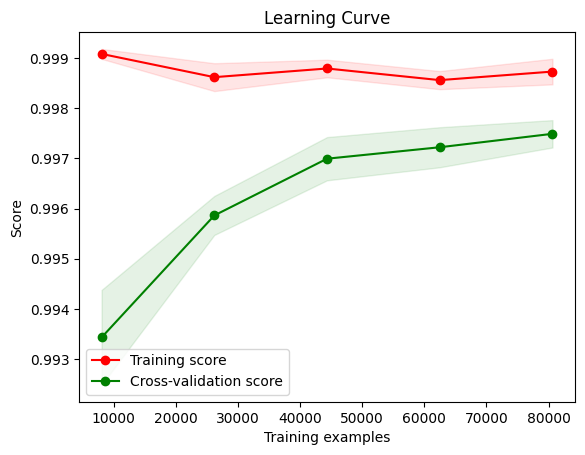

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve

def plot_learning_curve(estimator, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Пример использования
plot_learning_curve(mlp, X_train_scaled, y_train, cv=5)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


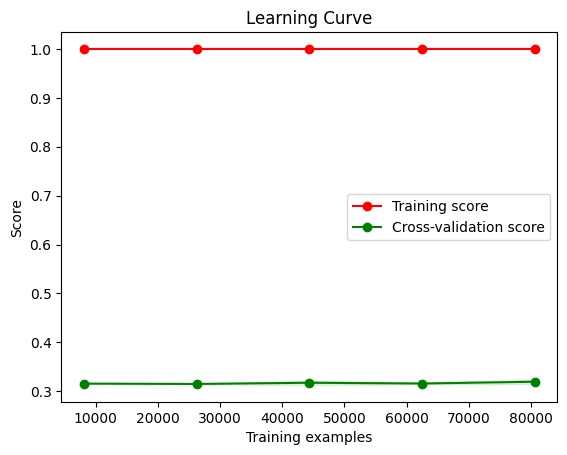

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve

def plot_learning_curve(estimator, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Пример использования
plot_learning_curve(ovr_classifier, X_train_scaled, y_train, cv=5)
plt.show()


Попытка сохранить и загрузить новый датасет

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
import pandas as pd

columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack', 'level']

# Загрузка нового датасета без меток
X_new = pd.read_csv('https://raw.githubusercontent.com/stepka123/basic-NL-SA/stepka123-KDD_Dataset/KDDTrain%2B.txt', header=None, names=columns)

# Функция для очистки датасета от NaN/Null значений
def clean_dataset(X_new):
    assert isinstance(X_new, pd.DataFrame), "X_new needs to be a pd.DataFrame"
    X_new.dropna(inplace=True)
    indices_to_keep = ~X_new.isin([np.nan, np.inf, -np.inf]).any(1)
    return X_new[indices_to_keep]

# Применение метода очистки к новому датасету
X_new = clean_dataset(X_new)

# Функция для кодирования категориальных признаков
def encode_categorical_features(X_new):
    # Применение Label Encoding к столбцам 'service', 'flag', 'attack' и 'protocol_type'
    label_encoders = {}
    for column in ['service', 'flag', 'attack', 'protocol_type']:
        le = LabelEncoder().fit(X_new[column])
        X_new[column] = le.transform(X_new[column])
        label_encoders[column] = le
    return X_new, label_encoders

# Кодирование категориальных признаков
X_new_encoded, label_encoders = encode_categorical_features(X_new)

# Применение масштабирования к новому датасету
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new_encoded)

# Загрузка обученной модели
def load_trained_model():
    # Загрузка модели из файла
    model = joblib.load('/content/model.pkl')
    return model

# Предсказание меток классов на новом датасете
mlp = load_trained_model()
y_pred_new = mlp.predict(X_new_scaled)

# Оценка результатов предсказаний
# Это предполагает, что у вас есть функция evaluate_predictions(), которая оценивает результаты предсказаний
evaluate_predictions(y_pred_new)


<ipython-input-15-e43a7dfbd81e>:14: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  indices_to_keep = ~X_new.isin([np.nan, np.inf, -np.inf]).any(1)


FileNotFoundError: [Errno 2] No such file or directory: '/content/model.pkl'

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Предположим, что df - это ваш DataFrame, и 'attack' - это целевая переменная
X = df.drop('attack', axis=1).values
y = df['attack'].values

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Преобразование данных в формат для LSTM
# Здесь мы предполагаем, что каждый образец состоит из 10 временных шагов
time_steps = 10
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], time_steps, -1))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], time_steps, -1))

# Создание и обучение LSTM модели
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, X_train_lstm.shape[2])))
model.add(Dense(1, activation='sigmoid')) # Предполагаем, что у нас есть бинарная классификация
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test))

# Предсказание меток классов для тестового набора данных
y_pred = model.predict_classes(X_test_lstm)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


ValueError: cannot reshape array of size 4131898 into shape (100778,10,newaxis)

###Здесь графики оценки работы классификаторов


Эти графики отображают метрики оценки качества модели для каждого класса (категории) в многоклассовой классификации. В многоклассовой классификации каждый класс рассматривается отдельно, и для каждого класса вычисляются метрики качества, такие как точность (precision), полнота (recall), F1-мера (F1-score) и поддержка (support).

1. График точности (Precision) по классам: Этот график показывает точность модели для каждого класса. Точность определяется как доля верно предсказанных положительных результатов от общего числа положительных результатов, предсказанных моделью.

2. График полноты (Recall) по классам: Полнота показывает, насколько хорошо модель идентифицирует все реальные положительные случаи. Она определяется как доля верно предсказанных положительных результатов от общего числа реальных положительных результатов в данных.

3. График F1-меры (F1-score) по классам: F1-мера - это гармоническое среднее между точностью и полнотой. Она представляет собой баланс между точностью и полнотой и используется как общая мера качества модели.

4. График поддержки (Support) по классам: Поддержка - это количество фактических вхождений каждого класса в тестовом наборе данных. Этот график показывает, сколько образцов было помечено как каждый класс.

Анализируя эти графики, можно понять, как модель справляется с каждым отдельным классом и определить, есть ли какие-либо классы, для которых модель показывает плохие результаты, что может помочь в дальнейшем улучшении модели.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       169
           1       1.00      0.75      0.86         4
           3       1.00      0.79      0.88        14
           5       0.99      0.99      0.99       737
           6       1.00      0.78      0.88         9
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00      8362
          10       0.99      0.98      0.98       319
          11       1.00      1.00      1.00     13295
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      0.98      0.99        41
          15       0.99      0.98      0.99       636
          16       0.00      0.00      0.00         1
          17       0.99      0.99      0.99       718
          18       1.00      1.00      1.00       554
          20       1.00    

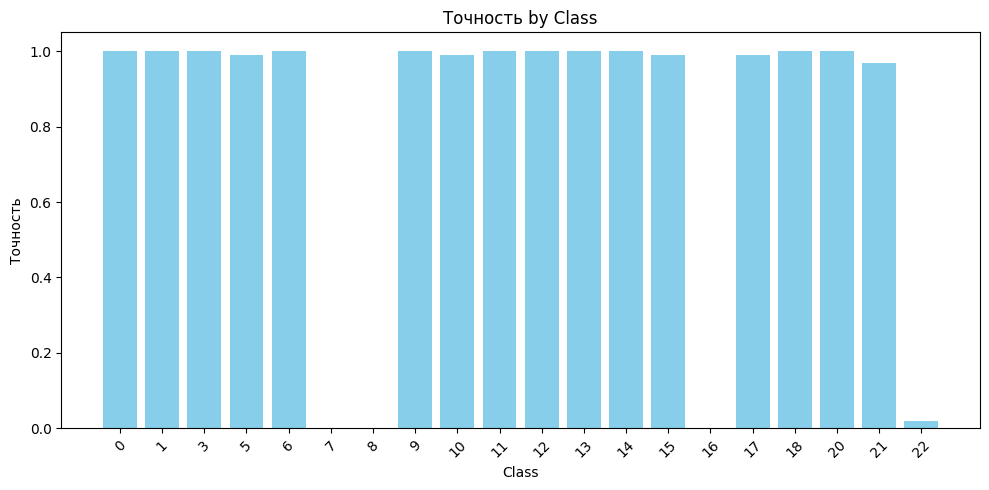

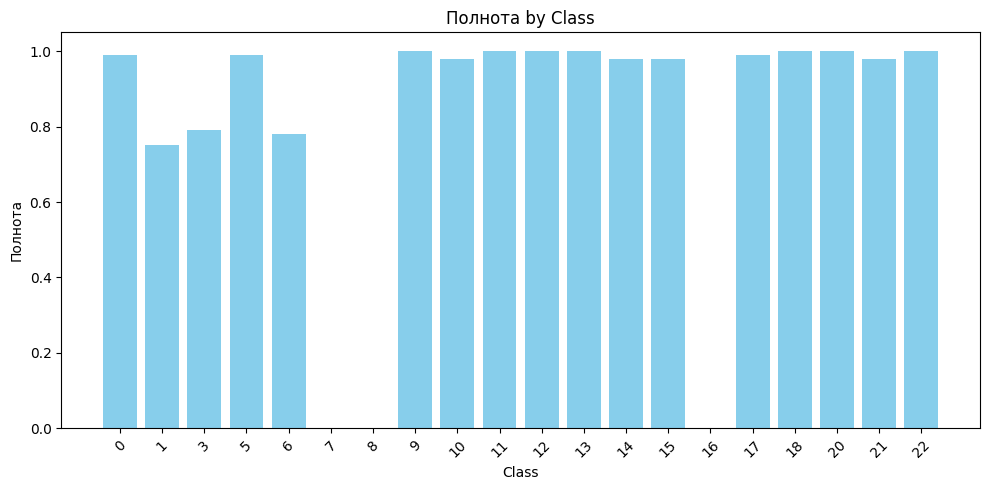

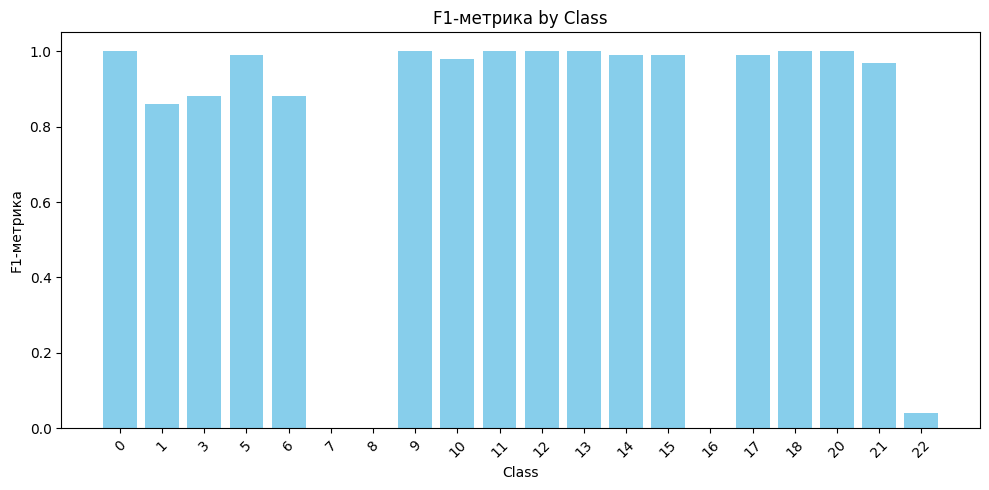

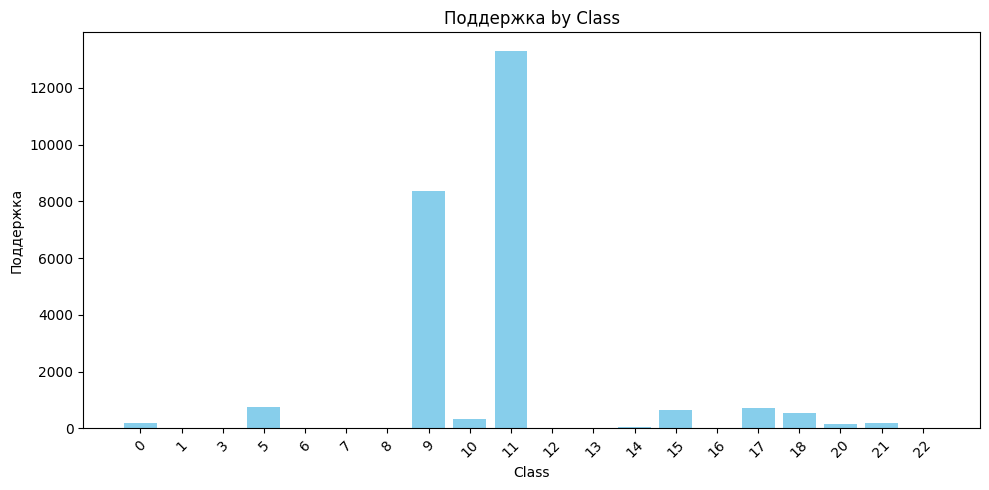

In [16]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Получение отчета классификации
report = classification_report(y_test, predictions)

# Печать отчета классификации
print(report)

# Разделение отчета классификации по строкам
report_data = report.split('\n')

# Извлечение метрик и значений из отчета классификации
labels = []
metrics = []
for row in report_data[2:-3]:  # Пропускаем заголовки и последние строки
    row_data = row.split()
    if len(row_data) == 5:  # Проверяем, достаточно ли элементов в строке
        label = row_data[0]
        precision = float(row_data[1])
        recall = float(row_data[2])
        f1 = float(row_data[3])
        support = float(row_data[4])
        labels.append(label)
        metrics.append({'Точность': precision, 'Полнота': recall, 'F1-метрика': f1, 'Поддержка': support})

# Построение графиков для каждой метрики
for metric in ['Точность', 'Полнота', 'F1-метрика', 'Поддержка']:
    values = [m[metric] for m in metrics]
    plt.figure(figsize=(10, 5))
    plt.bar(labels, values, color='skyblue')
    plt.xlabel('Class')
    plt.ylabel(metric)
    plt.title(f'{metric} by Class')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


##Модель классификации CART

Ниже модель классификации CART, это древовидный метод классификации или регресии. Данный код выполняет предсказание меток классов. Из минусов: не может

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y= df[['attack']]
X = df.drop(labels=['attack'], axis=1)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели дерева решений (CART)
model = DecisionTreeClassifier()

# Обучение модели на обучающем наборе данных
model.fit(X_train, y_train)

# Предсказание меток классов для тестового набора данных
y_pred = model.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9965866243302243


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


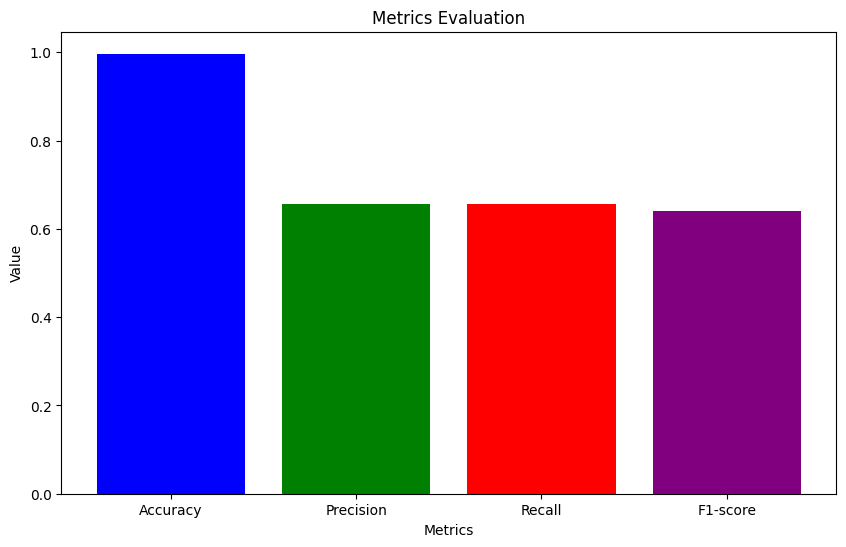

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Рассчитываем precision, recall и f1-score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Создаем списки с метриками и их названиями
metrics = [accuracy, precision, recall, f1]
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Строим графики
plt.figure(figsize=(10, 6))
plt.bar(labels, metrics, color=['blue', 'green', 'red', 'purple'])
plt.title('Metrics Evaluation')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.show()


Эта таблица отображает значения двух метрик - Accuracy (точность) и F1 Score (F1-мера). Она использует цветовую шкалу для визуализации этих значений.

1. Accuracy: Это процент правильно классифицированных объектов от общего числа объектов в тестовом наборе данных. Чем ближе значение к 1, тем лучше модель.
2. F1 Score: Это среднее гармоническое между точностью (precision) и полнотой (recall). F1-мера представляет собой баланс между этими двумя метриками и хорошо работает для несбалансированных классов. Чем ближе значение к 1, тем лучше модель.

<ipython-input-20-3719630a0c7b>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Metric': 'Accuracy', 'Score': accuracy}, ignore_index=True)
<ipython-input-20-3719630a0c7b>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Metric': 'F1 Score', 'Score': f1}, ignore_index=True)


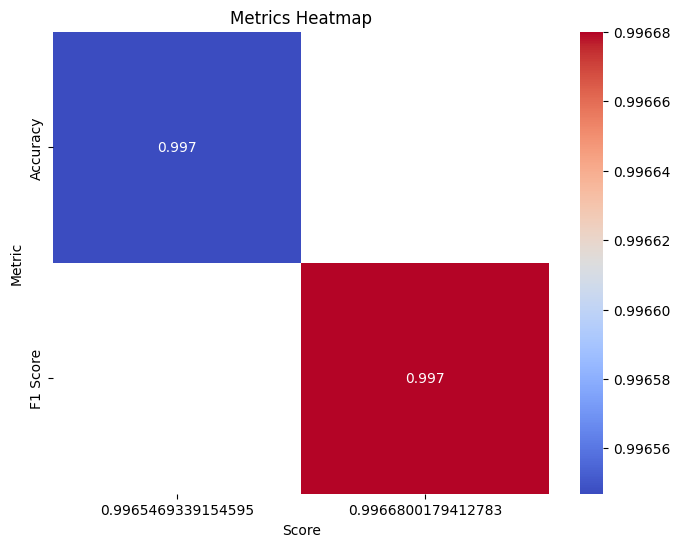

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создание DataFrame для хранения результатов
results_df = pd.DataFrame(columns=['Metric', 'Score'])

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели дерева решений (CART)
model = DecisionTreeClassifier()

# Обучение модели на обучающем наборе данных
model.fit(X_train, y_train)

# Предсказание меток классов для тестового набора данных
y_pred = model.predict(X_test)

# Оценка точности модели и добавление результатов в DataFrame
accuracy = accuracy_score(y_test, y_pred)
results_df = results_df.append({'Metric': 'Accuracy', 'Score': accuracy}, ignore_index=True)

# Оценка F1-меры модели и добавление результатов в DataFrame
f1 = f1_score(y_test, y_pred, average='weighted')  # Усреднение по всем классам
results_df = results_df.append({'Metric': 'F1 Score', 'Score': f1}, ignore_index=True)

# Преобразование DataFrame в формат таблицы (pivot table) для использования в тепловой карте
heatmap_df = results_df.pivot(index='Metric', columns='Score', values='Score')

# Отображение тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_df, cmap='coolwarm', annot=True, fmt=".3f")
plt.title('Metrics Heatmap')
plt.xlabel('Score')
plt.ylabel('Metric')
plt.show()


Этот код вычислит и отобразит confusion matrix для истинных меток (y_test) и предсказанных меток (y_pred) с использованием TensorFlow.

Confusion matrix (матрица ошибок) - это таблица, используемая в машинном обучении для оценки качества работы классификатора на наборе данных, для которого известны истинные значения. Каждая строка confusion matrix представляет собой фактическое количество экземпляров каждого класса, в то время как каждый столбец представляет собой количество экземпляров, предсказанных для каждого класса моделью.

В confusion matrix можно выделить четыре основных категории:

1. True Positives (TP): Количество экземпляров, которые были правильно классифицированы как положительные.
2. False Positives (FP): Количество экземпляров, которые были неправильно классифицированы как положительные.
3. True Negatives (TN): Количество экземпляров, которые были правильно классифицированы как отрицательные.
4. False Negatives (FN): Количество экземпляров, которые были неправильно классифицированы как отрицательные.

Confusion matrix позволяет наглядно оценить качество работы классификатора, а также рассчитать такие метрики как точность (accuracy), точность (precision), полноту (recall), F1-меру (F1-score) и другие.

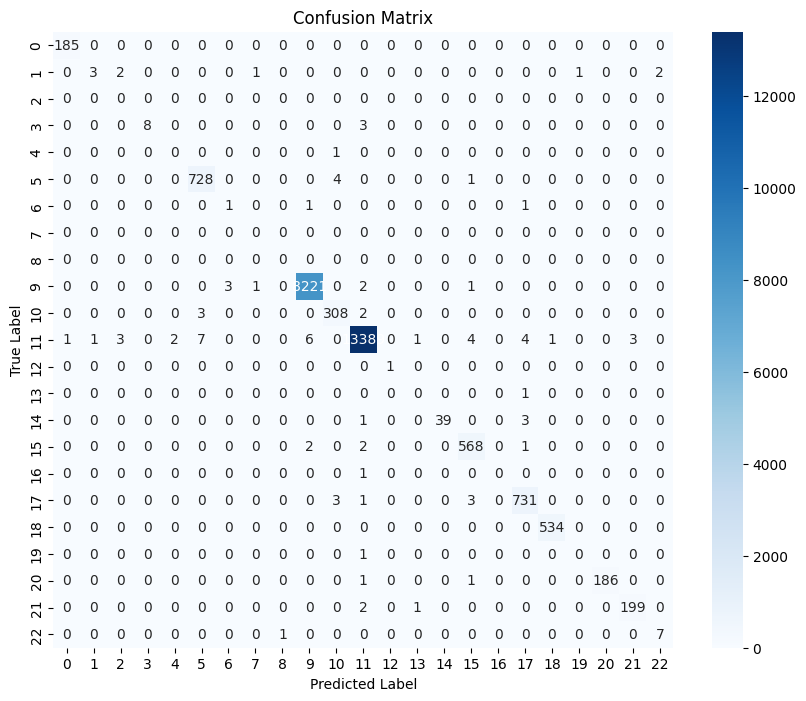

In [21]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Вычисление confusion matrix с помощью TensorFlow
conf_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

# Визуализация confusion matrix с помощью seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

##Здесь другая модель

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import numpy as np

# Задаем параметры итеративной кластеризации
chunk_size = 10000  # Размер части данных для обработки
total_samples = len(df)  # Общее количество образцов в датасете
n_clusters = 3  # Число кластеров

# Инициализируем пустую матрицу связности
Z = None

# Итерируемся по частям данных и обновляем модель
for i in range(0, total_samples, chunk_size):
    chunk = df.iloc[i:i+chunk_size]  # Выбираем очередную часть данных
    X = chunk[['protocol_type', 'service', 'flag', 'attack']]  # Выбираем признаки для кластеризации

    # Создаем и обучаем модель случайного леса
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X, np.arange(len(X)))  # Используем произвольные метки для обучения

    # Применяем модель для предсказания кластеров на тех же данных
    clusters = model.predict(X)

    # Обновляем матрицу связности
    if Z is None:
        Z = linkage(X, method='ward')
    else:
        Z_chunk = linkage(X, method='ward ')
        Z = np.concatenate((Z, Z_chunk), axis=0)

# Визуализация дендрограммы
plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram")
dendrogram = dendrogram(Z)
plt.ylabel('Euclidean distances')
plt.show()


ValueError: Invalid method: ward 